2024-10-09 16:28:19.737806: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 16:28:19.754408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 16:28:19.772571: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 16:28:19.778140: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 16:28:19.791810: I tensorflow/core/platform/cpu_feature_guar

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step


I0000 00:00:1728471505.258343  179910 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Image: 3_outlined


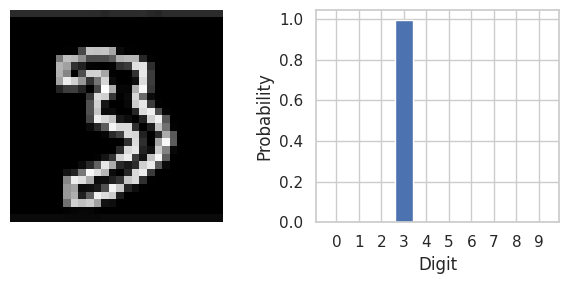

Predicted digit: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: 3_with_other_elements


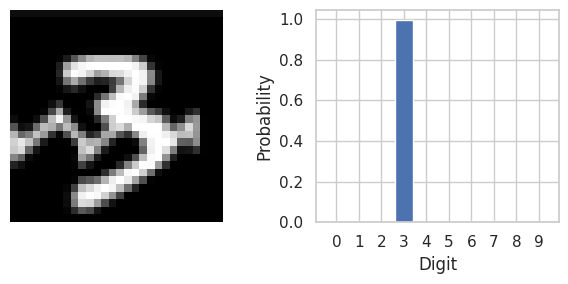

Predicted digit: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: blurryGrainy3


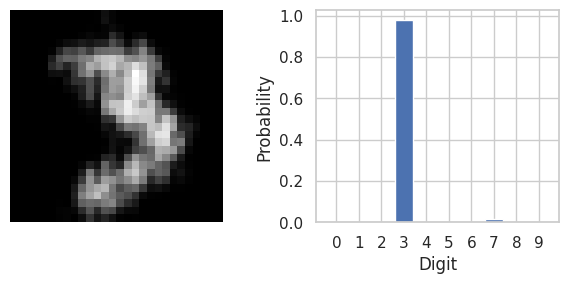

Predicted digit: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: foggy3


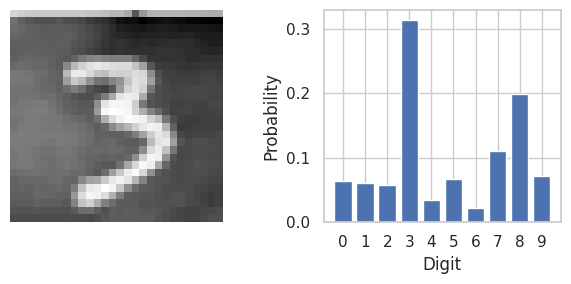

Predicted digit: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: its3_not5


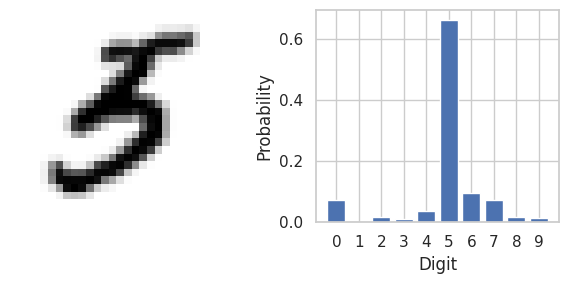

Predicted digit: 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: its4_not9


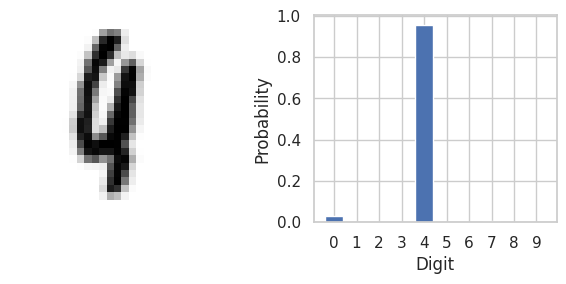

Predicted digit: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: noisy3


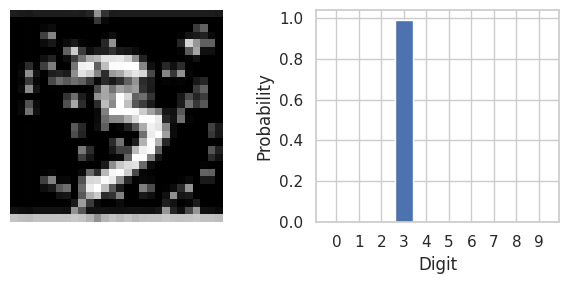

Predicted digit: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: striped3


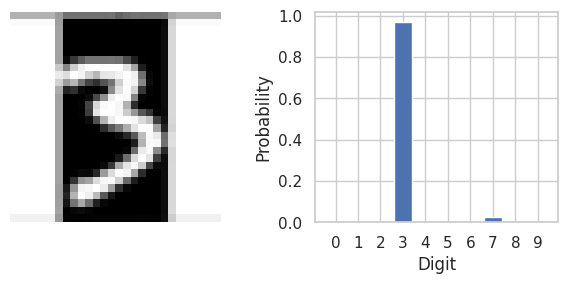

Predicted digit: 3




In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from PIL import Image

def load_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.load_weights('mnist_model.weights.h5')
    return model

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array.reshape((1, 28, 28, 1)).astype('float32') / 255
    return img_array

def predict_digit(model, image):
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)
    return predicted_digit, prediction[0]

def main():
    model = load_model()
    import os
    image_paths = [f for f in os.listdir() if f.endswith('.png')]
    for image_path in image_paths:
        processed_image = preprocess_image(image_path)
        # Predict
        predicted_digit, probabilities = predict_digit(model, processed_image)
        print(f"Image: {image_path.split('.')[0]}")
        import matplotlib.pyplot as plt
        import seaborn as sns
        sns.set(style='whitegrid')
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(processed_image.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.bar(np.arange(10), probabilities)
        plt.xlabel('Digit')
        plt.ylabel('Probability')
        plt.xticks(np.arange(10))
        plt.tight_layout()
        plt.show()
        print(f"Predicted digit: {predicted_digit}\n\n")

if __name__ == "__main__":
    main()